<a href="https://colab.research.google.com/github/farahashrafFUE/projrct-phase1-classification/blob/main/project_phas1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

In [ ]:
# Step 1: Load the dataset
data = pd.read_csv("Crop_recommendation.csv")

In [ ]:
# Display the head
print(data.head())   #print the first 5 records
print(data.columns) #print the columns of the dataset

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice
Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [ ]:
# Step 2: Data Cleaning
# Check for missing values
print(data.isnull().sum())
# Drop the missing values
data.dropna(inplace=True)  # Example: dropping rows with missing values


N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64


In [ ]:
# Step 3: Data Preprocessing
# Label encoding for the categorical column
label_encoder = LabelEncoder()  #convert words to numbers from scikit-learn
data['label'] = label_encoder.fit_transform(data['label']) # the only column that has words not numbers that I want to convert is label


In [ ]:
# # Checking if there are any negative values of X before scaling
# print("Minimum values of X before scaling:")
# print(X.min())

# Scaling numerical columns for positive values
scaler = StandardScaler()
numerical_cols = ['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])

# # Checking if there are any negative values of X after scaling
# print("Minimum values of X after scaling:")
# print(X.min())

In [ ]:
# Step 4: Split the dataset
X = data.drop('label', axis=1)
y = data['label']
# test_size=0.2: 20% of the data is allocated for testing, while 80% is used for training.
# random_state=42: Ensures that the split is reproducible. If you run the code again with the same random_state, you'll get the same split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 5: Train Decision Tree Models with different max_depth values
max_depths = range(1, 11)  #random range
accuracies = []

for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)  #from scikit-learn
    accuracies.append(accuracy)

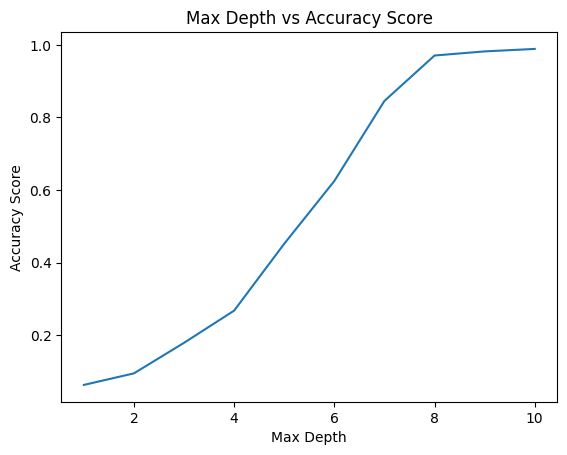

In [ ]:
# Step 6: Plotting the results
plt.plot(max_depths, accuracies)   #values of max_depths & accuracies
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Max Depth vs Accuracy Score')
plt.show()

In [ ]:
# Train the final Decision Tree model with max_depth = 10
final_model = DecisionTreeClassifier(max_depth=10)
final_model.fit(X_train, y_train)

# Evaluate the model on the test data
y_final_pred = final_model.predict(X_test)
final_accuracy = accuracy_score(y_test, y_final_pred)
print(f"Final model accuracy with max_depth = 10: {final_accuracy}")

Final model accuracy with max_depth = 10: 0.9886363636363636
Feature: N, Importance: 0.1446232143669531
Feature: P, Importance: 0.25946242133342057
Feature: K, Importance: 0.09695737643060384
Feature: temperature, Importance: 0.00423917334480084
Feature: humidity, Importance: 0.23431514845439044
Feature: ph, Importance: 0.007048455527386849
Feature: rainfall, Importance: 0.2533542105424444


In [ ]:
# Step 7: Feature Selection using Chi-Square test    Chi-Square (χ²)
# Checking for negative values in X
if (X < 0).any().any():
    print("Negative values found in X. Transforming negative values to non-negative.")
    # Transform negative values by adding a constant (e.g., abs(min(X.min())) + 1)
    X = X + abs(X.min()) + 1
    #Its absolute value is added to all features, shifting them to be non-negative
    #+1 ensures that the minimum value is at least 1 (avoiding zeros)

# Applying the Chi-Square test
chi2_values, p_values = chi2(X, y)
#Instead of keeping all features (k='all'), it now selects the top K features based on the highest Chi-Square scores
feature_selection = SelectKBest(chi2, k='all').fit(X, y) #Selects all features and ranks them using the Chi-Square test
selected_features = feature_selection.get_support(indices=True)
print("Selected features based on Chi-Square test:", X.columns[selected_features])

Negative values found in X. Transforming negative values to non-negative.
Selected features based on Chi-Square test: Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')
